# Clustering: Wholesale Customers

### - Bassam Atheeque
---

## Data description:

This dataset contains customers of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

**Customer_ID**: Customer identification number

**Fresh**: Annual spending (m.u.) on fresh products

**Milk**: Annual spending (m.u.) on milk products 

**Grocery**: Annual spending (m.u.) on grocery products 

**Frozen**: Annual spending (m.u.) on frozen products

**Detergents_Paper**: Annual spending (m.u.) on detergents and paper products

**Delicassen**: Annual spending (m.u.) on delicatessen products

In [1]:
# Importing the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
wholesale_df = pd.read_csv('./wholesale.csv')
wholesale_df

,Customer_ID,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,3,13265,1196,4221,6404,507,1788
3,4,9413,8259,5126,666,1795,1451
4,5,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...
353,354,21117,1162,4754,269,1328,395
354,355,1982,3218,1493,1541,356,1449
355,356,16731,3922,7994,688,2371,838
356,357,10290,1981,2232,1038,168,2125


### Excluding the first column of Customer_ID as it is irrelevant for the calculation:

In [3]:
wholesale = wholesale_df.iloc[:, 1:]
wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,13265,1196,4221,6404,507,1788
3,9413,8259,5126,666,1795,1451
4,12126,3199,6975,480,3140,545


## Standardizing all the features:

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ws_scaled = ss.fit_transform(wholesale)
ws_scaled

array([[ 0.37898956,  1.59903457,  0.29119558, -0.8795221 ,  0.25166945,
         0.3394275 ],
       [-0.31542767,  1.6440197 ,  0.66982855, -0.18882147,  0.49701705,
         0.84353902],
       [ 0.45273737, -0.87222605, -0.33891611,  1.88238805, -0.60724533,
         0.85735029],
       ...,
       [ 0.88161301, -0.07593096,  0.37288371, -0.6680285 ,  0.131572  ,
        -0.23604227],
       [ 0.08461704, -0.64291877, -0.71415327, -0.51186233, -0.74161178,
         1.24521692],
       [-0.84378861, -0.72558623, -0.66170685, -0.94600427, -0.61913616,
        -1.14068075]])

#### Creating dataframe with the standardized features:

In [5]:
wholesale_sc = pd.DataFrame ( data = ws_scaled, columns = wholesale.columns)
wholesale_sc

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.378990,1.599035,0.291196,-0.879522,0.251669,0.339428
1,-0.315428,1.644020,0.669829,-0.188821,0.497017,0.843539
2,0.452737,-0.872226,-0.338916,1.882388,-0.607245,0.857350
3,-0.023901,1.190955,-0.168182,-0.677845,-0.096732,0.469484
4,0.311800,-0.287127,0.180643,-0.760836,0.436374,-0.573268
...,...,...,...,...,...,...
353,1.424328,-0.882158,-0.238362,-0.854982,-0.281833,-0.745908
354,-0.943398,-0.281577,-0.853570,-0.287429,-0.667096,0.467182
355,0.881613,-0.075931,0.372884,-0.668028,0.131572,-0.236042
356,0.084617,-0.642919,-0.714153,-0.511862,-0.741612,1.245217


### k-means clustering with 5 clusters, random initial cluster centroids, random state of 66:

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'random', n_init = 1, random_state = 66, max_iter = 1 )
kmeans.fit(wholesale_sc)

KMeans(init='random', max_iter=1, n_clusters=5, n_init=1, random_state=66)

### Scatter plot of spendings in fresh vs frozen products:

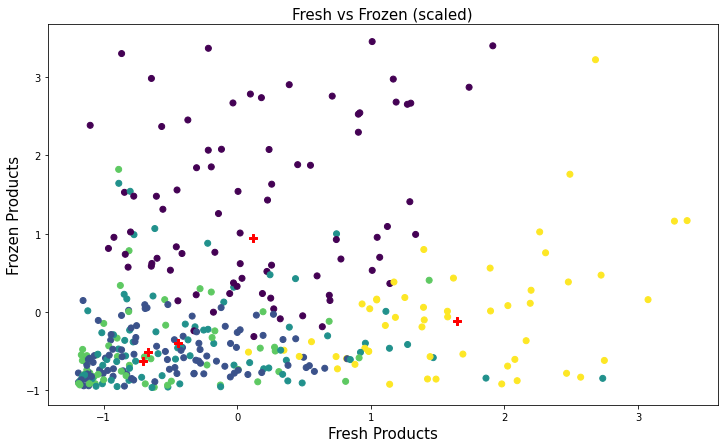

In [7]:
plt.figure(figsize = (12,7))
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns = wholesale.columns)
plt.scatter ( wholesale_sc['Fresh'], wholesale_sc['Frozen'], c = kmeans.labels_)
plt.scatter ( centroids['Fresh'], centroids['Frozen'], c = 'red',marker = 'P' , s = 50)
plt.title('Fresh vs Frozen (scaled)', size = 15)
plt.xlabel('Fresh Products', size = 15)
plt.ylabel('Frozen Products', size = 15)

plt.show()

### Adding the converged cluster centroids onto the above plot:

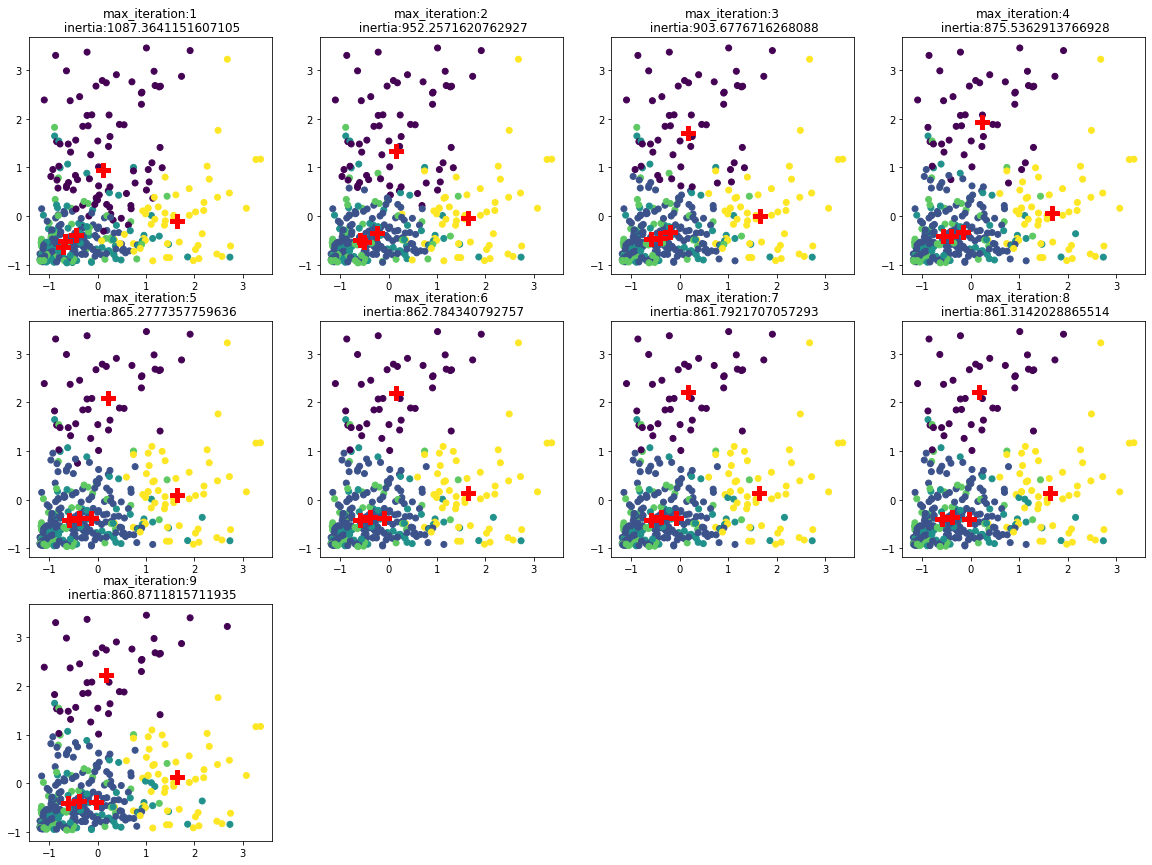

In [8]:
plt.figure(figsize = (20,20))
for i in range (1,10):
    plt.subplot (4,4,i)
    kmeans_iter = KMeans(n_clusters = 5, init = 'random', n_init = 1, random_state = 66, max_iter = i)
    kmeans_iter.fit(wholesale_sc)

    centroids_itercc = kmeans_iter.cluster_centers_
    centroids_iter = pd.DataFrame(centroids_itercc, columns = wholesale.columns)
    plt.scatter ( wholesale_sc['Fresh'], wholesale_sc['Frozen'], c = kmeans_iter.labels_)
    plt.scatter ( centroids_iter['Fresh'], centroids_iter['Frozen'], c = 'red',marker = 'P' , s = 200)
    plt.title ('max_iteration:' + str(i) +  '\n inertia:' + str(kmeans_iter.inertia_))

### It took a final of 8 iterations to converge completely.
### The inertia for this clustering solution is 857.745

## Elbow Method:
### We are trying to determine the effective number of clusters *k* using elbow method. We will run the alogrithm for 30 runs with different seeds and we will be using the default method for initializing the seeds.

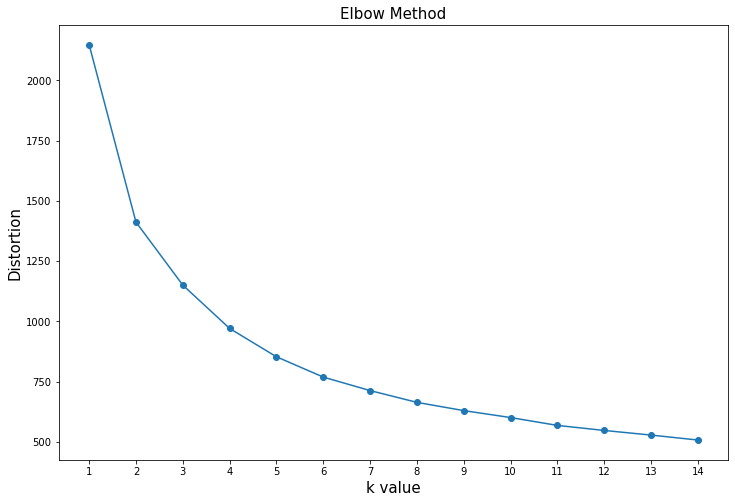

In [9]:
inertia = []
for k in range (1, 15):
    kmeans_elbow = KMeans(n_clusters = k, n_init = 30, random_state = 66).fit(wholesale_sc)
    inertia.append ([k, kmeans_elbow.inertia_])

    
inertia_df = pd.DataFrame(inertia)

plt.figure(figsize=(12,8))
plt.plot (inertia_df[0], inertia_df[1], marker = 'o')
plt.xticks(range (1, 15))
plt.xlabel('k value', size = 15)
plt.ylabel('Distortion', size = 15)
plt.title('Elbow Method', size = 15)
plt.show()

### According to the Elbow Method, my choice of k is 4 as that is the point where the 'mountain' ends and 'rubble' beings.

## Silhouette Analysis:
### We are trying to determine the effective number of clusters *k* using silhouette analysis. We will run the alogrithm for 30 runs with different seeds and we will be using the default method for initializing the seeds.

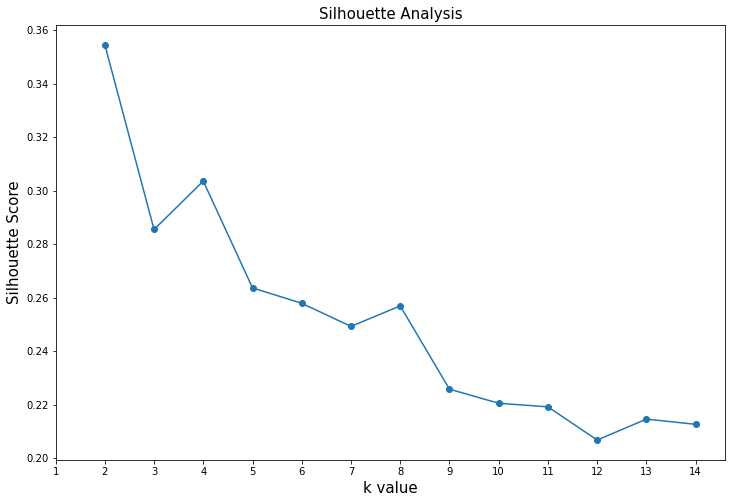

In [10]:
from sklearn.metrics import silhouette_score

silhouette = []
for k in range (2, 15):
    kmeans_silhouette = KMeans(n_clusters = k, n_init = 30, random_state = 66).fit(wholesale_sc)
    silhouette.append ([k, silhouette_score(wholesale_sc, kmeans_silhouette.labels_)])

    
silhouette_df = pd.DataFrame(silhouette)

plt.figure(figsize=(12,8))
plt.plot (silhouette_df[0], silhouette_df[1], marker = 'o')
plt.xticks(range(1,15))
plt.xlabel('k value', size = 15)
plt.ylabel('Silhouette Score', size = 15)
plt.title('Silhouette Analysis', size = 15)
plt.show()

### According to the above, my choice of k is 2 as the silhouette score is the highest for this k value. The highest mean of silhouette coefficients means that the distance between the data points and the centroid is lesser which is much better for a cluster.

### Now, we will try to determine the best value of *k* with the constraint of having at least 3 versions of advertisings and not more than 7 versions using the the Elbow method and the Silhouette analysis.

####  Elbow Method with conditions:

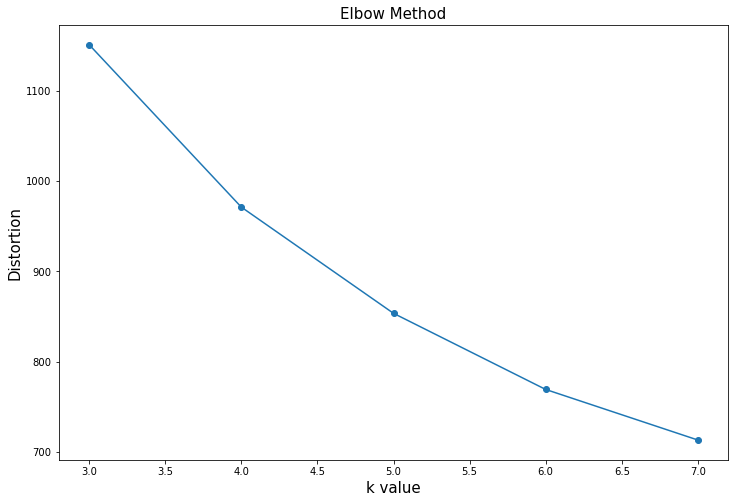

In [11]:
inertia2 = []
for k in range (3, 8):
    kmeans_elbow2 = KMeans(n_clusters = k, n_init=30, random_state = 66).fit(wholesale_sc)
    inertia2.append ([k, kmeans_elbow2.inertia_])

    
inertia_df2 = pd.DataFrame(inertia2)

plt.figure(figsize=(12,8))
plt.plot (inertia_df2[0], inertia_df2[1], marker = 'o')
plt.xlabel('k value', size = 15)
plt.ylabel('Distortion', size = 15)
plt.title('Elbow Method', size = 15)
plt.show()

####  Silhouette Analysis with conditions:

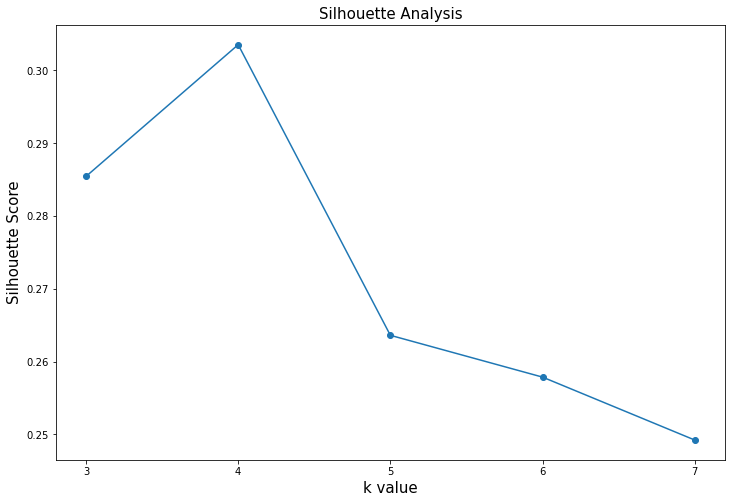

In [12]:
silhouette2 = []
for k in range (3, 8):
    kmeans_silhouette2 = KMeans(n_clusters = k, n_init=30, random_state = 66).fit(wholesale_sc)
    silhouette2.append ([k, silhouette_score(wholesale_sc, kmeans_silhouette2.labels_)])

    
silhouette_df2 = pd.DataFrame(silhouette2)

plt.figure(figsize=(12,8))
plt.plot (silhouette_df2[0], silhouette_df2[1], marker = 'o')
plt.xticks(range(3,8))
plt.xlabel('k value', size = 15)
plt.ylabel('Silhouette Score', size = 15)
plt.title('Silhouette Analysis', size = 15)
plt.show()

### According to the above, my choice of k is 4 as the silhouette score is the highest for this k value. The highest mean of silhouette coefficients means that the distance between the data points and the centroid is lesser which is much better for a cluster.

### With *k=4*, we will run the algorithm again with 30 runs, default method for seed initialization, and a random state of 99.

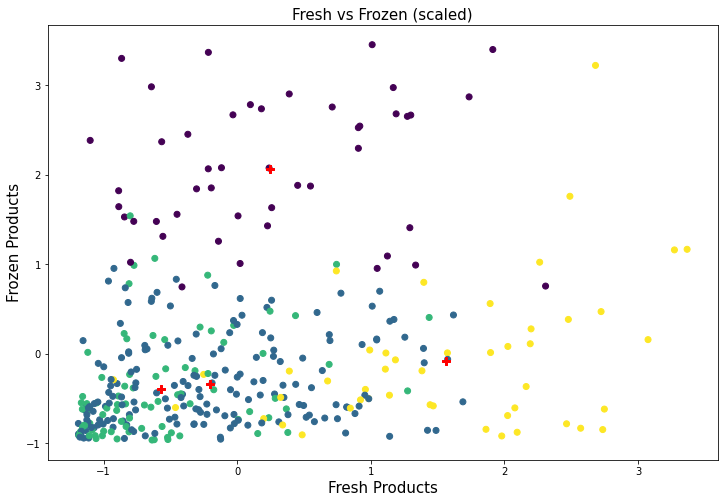

In [13]:
kmeans_5 = KMeans(n_clusters = 4, random_state = 99, n_init = 30)
kmeans_5.fit(wholesale_sc)

plt.figure (figsize = (12,8))
centroids_5 = kmeans_5.cluster_centers_
centroids_5 = pd.DataFrame(centroids_5, columns = wholesale.columns)
plt.scatter ( wholesale_sc['Fresh'], wholesale_sc['Frozen'], c = kmeans_5.labels_)
plt.scatter ( centroids_5['Fresh'], centroids_5['Frozen'], c = 'red',marker = 'P' , s = 50)
plt.title('Fresh vs Frozen (scaled)', size = 15)
plt.xlabel('Fresh Products', size = 15)
plt.ylabel('Frozen Products', size = 15)
plt.show()

####  Line graph to show the mean feature values for each cluster of customers. In the graph, each cluster would be one line, and the x-axis represents the different features, the y-axis is the standardized feature value.

In [14]:
kmeans_5.cluster_centers_

array([[ 0.24661894, -0.3540208 , -0.56124542,  2.06665463, -0.56483468,
        -0.06249528],
       [-0.20280473, -0.54402852, -0.53026935, -0.33382293, -0.49282536,
        -0.44584119],
       [-0.57176752,  1.24128085,  1.40032087, -0.39511828,  1.48613416,
         0.27237512],
       [ 1.55981268,  0.18108959,  0.04828668, -0.08071081, -0.24592412,
         1.26789288]])

In [15]:
kmeans_tp = np.transpose(kmeans_5.cluster_centers_)

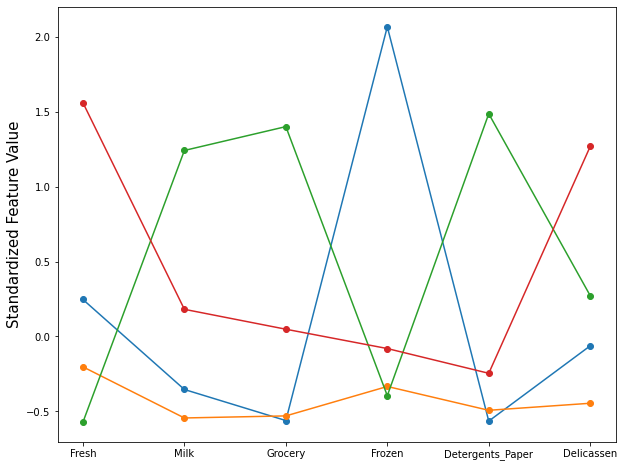

In [16]:
plt.figure(figsize = (10,8))
plt.plot(kmeans_tp, marker = 'o')
plt.ylabel('Standardized Feature Value', size = 15)
plt.xticks(range(0,6),wholesale.columns)
plt.show()

In [17]:
ws_inv = ss.inverse_transform(kmeans_5.cluster_centers_)
ws_inv

array([[11599.23404255,  2970.        ,  3042.5106383 ,  6816.9787234 ,
          614.        ,   988.78723404],
       [ 7967.17318436,  2319.53631285,  3206.70391061,  1437.02234637,
          795.67597765,   655.7150838 ],
       [ 4985.36470588,  8431.28235294, 13440.08235294,  1299.64705882,
         5788.49411765,  1279.74117647],
       [22211.93617021,  4801.87234043,  6273.42553191,  2004.29787234,
         1418.59574468,  2144.70212766]])

In [18]:
wholesale_org_cent = pd.DataFrame(ws_inv, columns = wholesale.columns, index = [1,2,3,4])
wholesale_org_cent

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,11599.234043,2970.000000,3042.510638,6816.978723,614.000000,988.787234
2,7967.173184,2319.536313,3206.703911,1437.022346,795.675978,655.715084
3,4985.364706,8431.282353,13440.082353,1299.647059,5788.494118,1279.741176
4,22211.936170,4801.872340,6273.425532,2004.297872,1418.595745,2144.702128


### Based on the above line graph and the data points, we can summarize the below findings:
-> For the 1st cluster, the customers spend the maximum for 'Grocery' followed by 'Milk'. Rest all spendings are similar.

-> For the 2nd cluster, the annual spending is highest for 'Fresh' and lowest for 'Delicassen'.

-> For the 3rd cluster, the customers spend the most for 'Milk', and lowest for 'Delicassen'.

-> For the 4rth cluster, the customers spend the least for 'Detergents Paper' and highest for 'Fresh'.

### Calculating mean of the features to determine the centroid value:

In [19]:
wholesale_org_cent['CENTROID'] = (wholesale_org_cent['Fresh']+wholesale_org_cent['Milk']+wholesale_org_cent['Grocery']+wholesale_org_cent['Frozen']+wholesale_org_cent['Detergents_Paper']+wholesale_org_cent['Delicassen'])/6
wholesale_org_cent

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,CENTROID
1,11599.234043,2970.000000,3042.510638,6816.978723,614.000000,988.787234,4338.585106
2,7967.173184,2319.536313,3206.703911,1437.022346,795.675978,655.715084,2730.304469
3,4985.364706,8431.282353,13440.082353,1299.647059,5788.494118,1279.741176,5870.768627
4,22211.936170,4801.872340,6273.425532,2004.297872,1418.595745,2144.702128,6475.804965


## Thank You!
---